### Jorge Gerardo Iglesias Ortiz - A01653261
### Alejandro Hernández De la Torre - A01651516
### Santiago Orozco Quintero - A01658308
### Carlos Andres Barredeaz Rios - A01653183
### Jorge Yepez Frutos - A01652661

# Trabajo en el reto

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from wordcloud import WordCloud
import ast
import re

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

dfv = pd.read_csv("covid19_tweets.csv",parse_dates=["date"], index_col="date")
print(dfv)

df = pd.read_csv('covid19_tweets.csv')

                                    user_name         user_location  \
date                                                                  
2020-07-25 12:27:21                    ᏉᎥ☻լꂅϮ            astroworld   
2020-07-25 12:27:17             Tom Basile 🇺🇸          New York, NY   
2020-07-25 12:27:14           Time4fisticuffs      Pewee Valley, KY   
2020-07-25 12:27:10               ethel mertz  Stuck in the Middle    
2020-07-25 12:27:08                  DIPR-J&K     Jammu and Kashmir   
...                                       ...                   ...   
2020-08-04 03:13:29             Laura Wolfrom         Lexington, KY   
2020-08-04 03:13:26  Professor Tonya M. Evans         😷 #stayathome   
2020-08-04 03:13:22        People's Daily app           北京, 中华人民共和国   
2020-08-04 03:13:19                     M0ser                   NaN   
2020-08-04 03:13:15    Your Friend & Sabre ⚔️           Chicago, IL   

                                                      user_description  \
da

In [2]:
df1=dfv.resample('H').sum()
df1 = df1.drop(df1[df1['user_verified']==0].index) #borramos las columnas donde no existen datos
df1.head(50)


,user_followers,user_friends,user_favourites,user_verified,is_retweet
date,,,,,
2020-07-24 23:00:00,6921791,750145,5287795,14,0
2020-07-25 00:00:00,107968868,3607161,27607518,155,0
2020-07-25 01:00:00,132829339,4358358,30945431,141,0
2020-07-25 02:00:00,157792726,2628135,17799737,142,0
2020-07-25 03:00:00,142410717,2393866,18910575,126,0
2020-07-25 04:00:00,180399160,2284165,14693968,169,0
2020-07-25 05:00:00,133326342,2212167,17266743,174,0
2020-07-25 06:00:00,209287212,2004381,12778354,179,0
2020-07-25 07:00:00,197726389,3463423,18209929,215,0


<AxesSubplot:xlabel='date'>

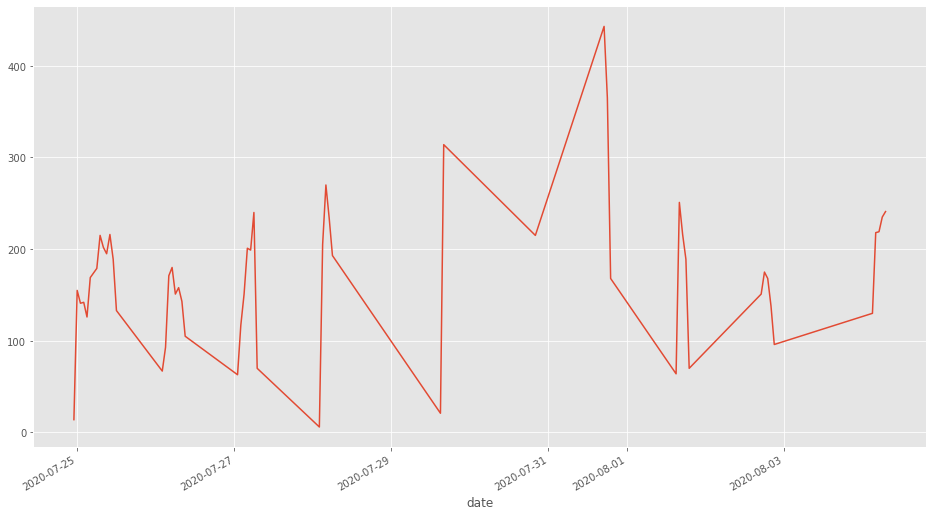

In [3]:
df1['user_verified'].plot()

<AxesSubplot:xlabel='date'>

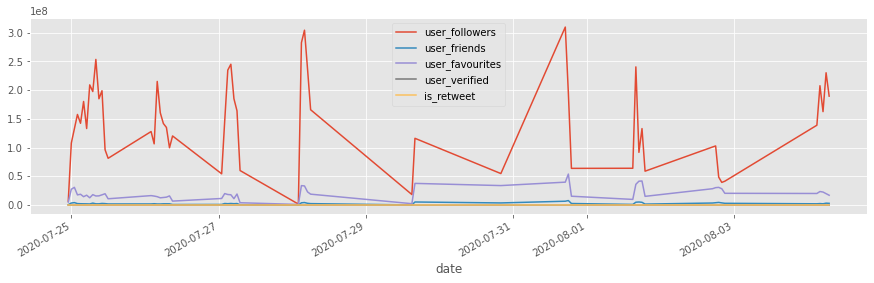

In [4]:
fix, ax=plt.subplots(figsize=(15,4))
df1.plot(ax=ax)

<AxesSubplot:xlabel='date'>

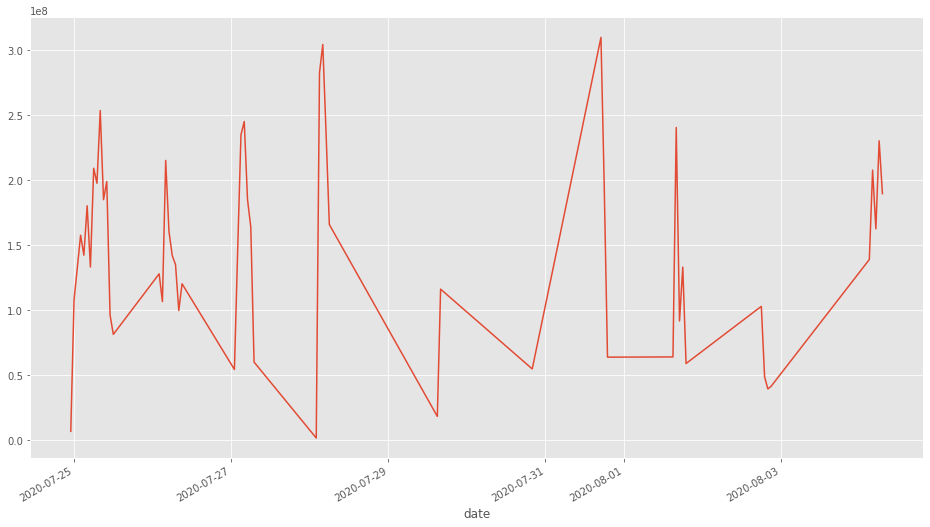

In [5]:
df1['user_followers'].plot()


In [6]:
X = np.array(df[["user_followers","user_friends"]])
y = np.array(df["user_favourites"])
X.shape

(74436, 2)

C:\Users\USUARIO\AppData\Local\Temp/ipykernel_72668/1148580877.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


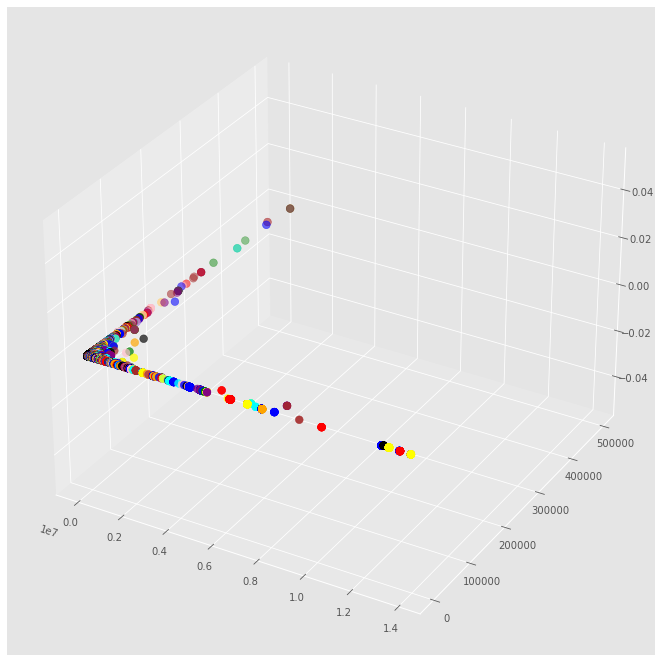

In [7]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[int(row%11)])
ax.scatter(X[:, 0], X[:, 1], c=asignar,s=60)

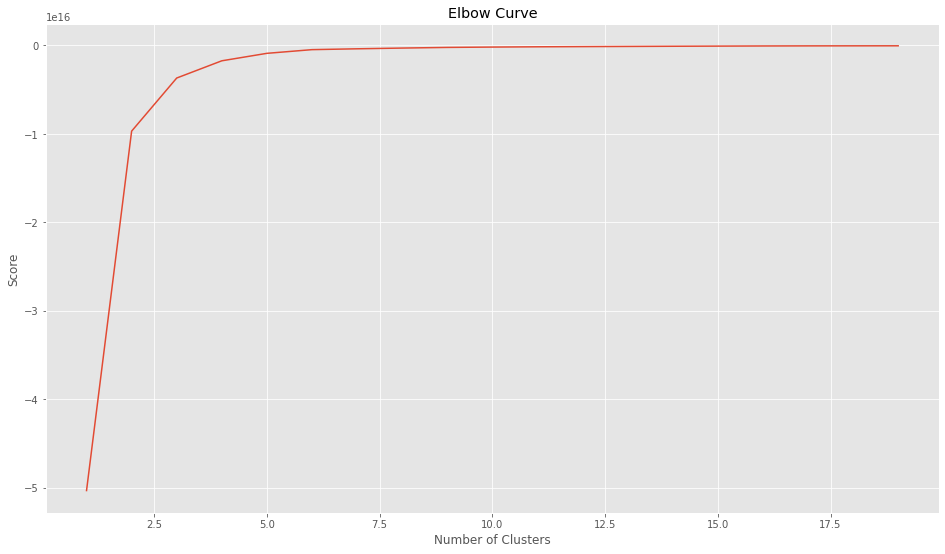

In [8]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [9]:
kmeans = KMeans(n_clusters=4).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[1.83148000e+04 2.17754637e+03]
 [6.23958658e+06 7.68970414e+02]
 [1.30086912e+07 2.19937888e+02]
 [1.88081638e+06 1.20131633e+03]]


C:\Users\USUARIO\AppData\Local\Temp/ipykernel_72668/3406312632.py:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


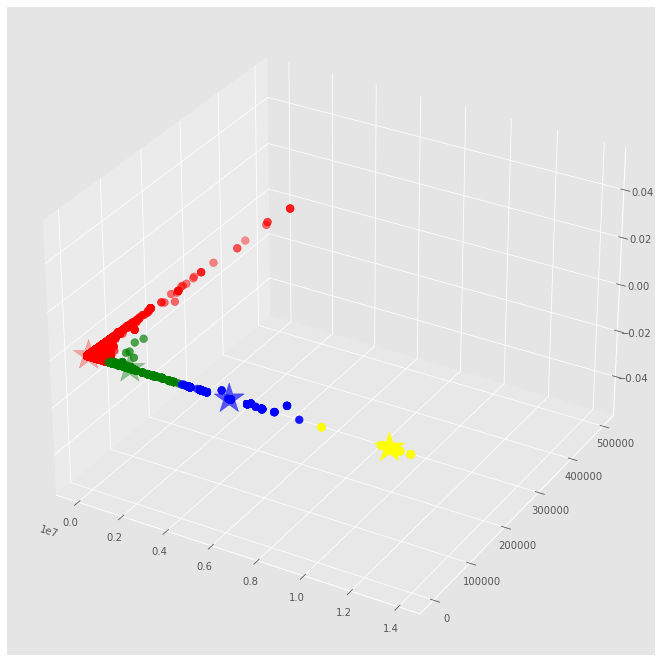

In [10]:
labels = kmeans.predict(X)
C = kmeans.cluster_centers_
colores=['red','blue','yellow','green']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)

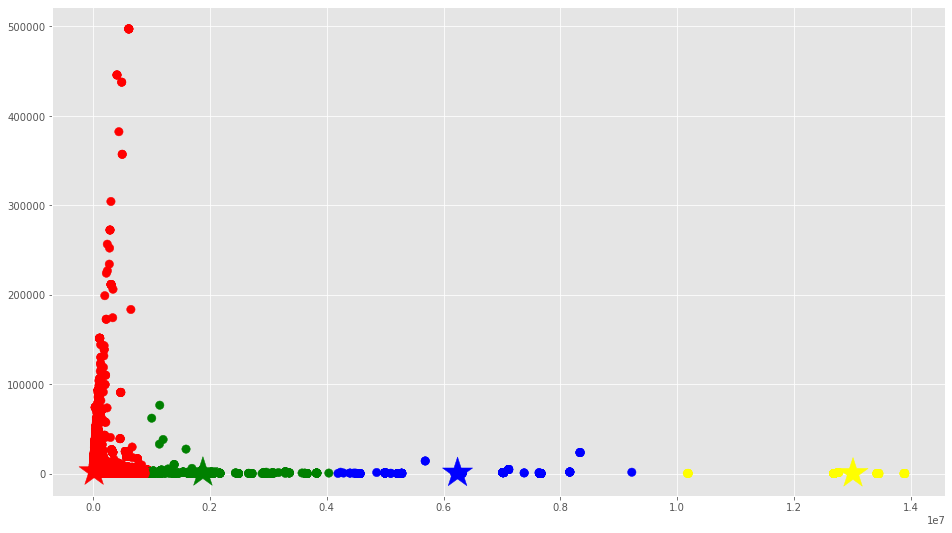

In [11]:
f1 = df["user_followers"].values
f2 = df["user_friends"].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

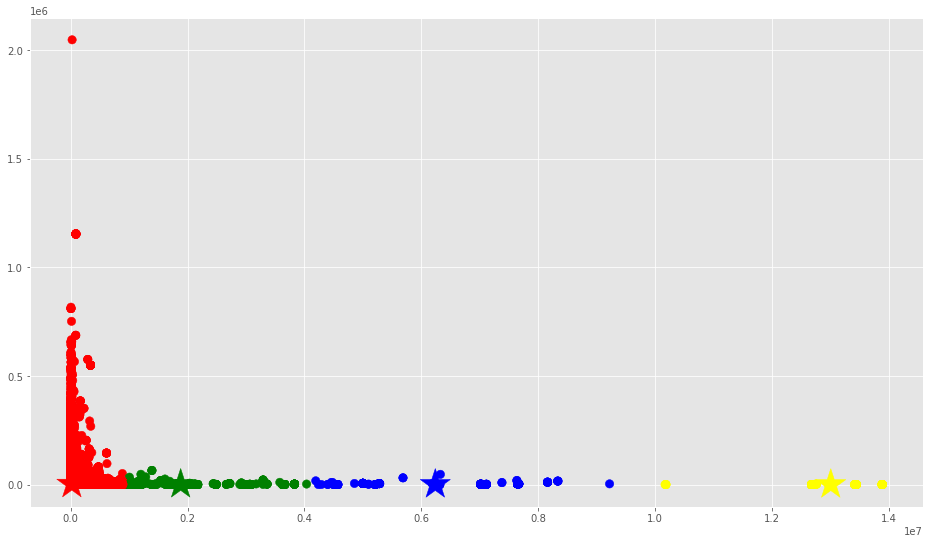

In [12]:
f1 = df["user_followers"].values
f2 = df["user_favourites"].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

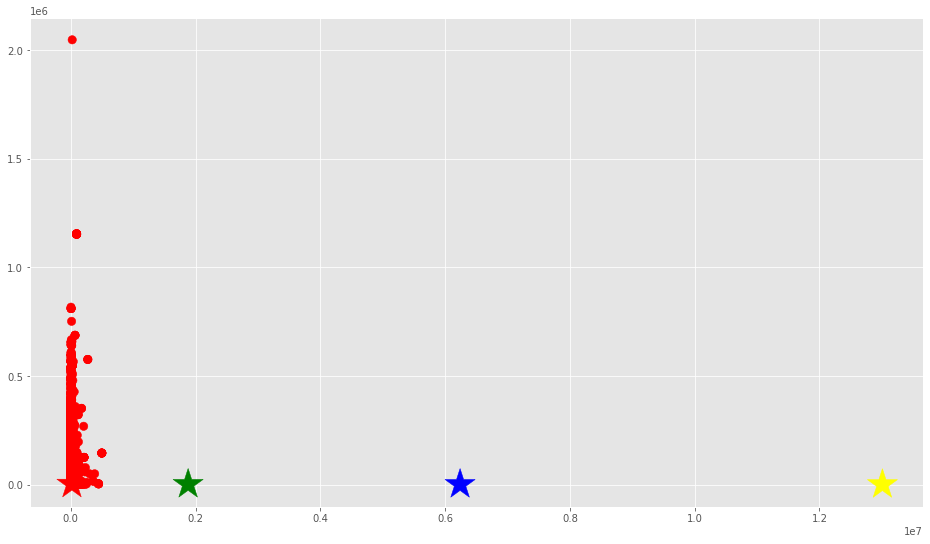

In [13]:
f1 = df["user_friends"].values
f2 = df["user_favourites"].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

In [14]:
copy =  pd.DataFrame()
copy['usuario']=df['user_name'].values
copy['categoria']=df['user_favourites'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,73082
1,blue,507
2,yellow,161
3,green,686


In [15]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame(df)
#diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9,10]
#print(group_referrals)
diversidadGrupo['cantidad']=group_referrals.groupby('usuario').size()
diversidadGrupo

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,cantidad
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,NaN
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False,NaN
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,NaN
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False,NaN
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74431,Laura Wolfrom,"Lexington, KY",The only things I collect are memories.,2010-09-24 02:01:15,85,586,1902,False,2020-08-04 03:13:29,So far this summer I have filled up my lawn mo...,"['COVID19', 'QuarantineLife']",Twitter for iPhone,False,NaN
74432,Professor Tonya M. Evans,😷 #stayathome,Law Prof @DickinsonLaw & Entrepreneur | Crypto...,2013-05-14 20:15:24,4289,1066,53569,False,2020-08-04 03:13:26,"ICYMI: REPLAY: #TechIntersect🧩 #16: Isaiah ""@B...","['TechIntersect', 'Bitcoin', 'COVID19']",Twitter Web App,False,NaN
74433,People's Daily app,"北京, 中华人民共和国",Our mission is to provide news and perspective...,2018-02-04 12:36:42,1413,102,16,False,2020-08-04 03:13:22,Community workers in Tianshan District of Urum...,"['China', 'Xinjiang']",Twitter Web App,False,NaN
74434,M0ser,NaN,Reagan conservative and attorney raised in the...,2014-02-18 03:46:28,2554,1733,129104,False,2020-08-04 03:13:19,If only we had a responsible media to warn us ...,['COVID19'],Twitter for iPhone,False,NaN


In [16]:
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([25836,  2851, 70675, 72372], dtype=int64)

In [17]:
users=df['user_name'].values
for row in closest:
    print(users[row])

Fatima Alasrar
SkyNews
The Times Of India
UN Women


In [18]:
co_df_std = df.groupby('user_location').agg({'user_followers' : 'std'}).sort_values('user_followers',ascending = False)
co_df_mn = df.groupby('user_location').agg({'user_followers' : 'mean'}).sort_values('user_followers',ascending = False)
co_df_mdn = df.groupby('user_location').agg({'user_followers' : 'median'}).sort_values('user_followers',ascending = False)

In [19]:
print(df.dtypes)

user_name            object
user_location        object
user_description     object
user_created         object
user_followers        int64
user_friends          int64
user_favourites       int64
user_verified          bool
date                 object
text                 object
hashtags             object
source               object
is_retweet             bool
cantidad            float64
dtype: object


In [20]:
co_df_mn.head(15)

,user_followers
user_location,
"Headquartered in Beijing, PRC",1.268052e+07
New Delhi & Thiruvananthapuram,7.635618e+06
The Interwebs,7.379812e+06
"The Pentagon, Washington, D.C.",6.186636e+06
Centro de la Ciudad de México,5.686527e+06
"Manila, Philippines",4.391670e+06
"Beijing, China",3.356276e+06
"Shastri Bhawan, New Delhi",2.663792e+06
Philippines,2.318235e+06


<AxesSubplot:ylabel='user_location'>

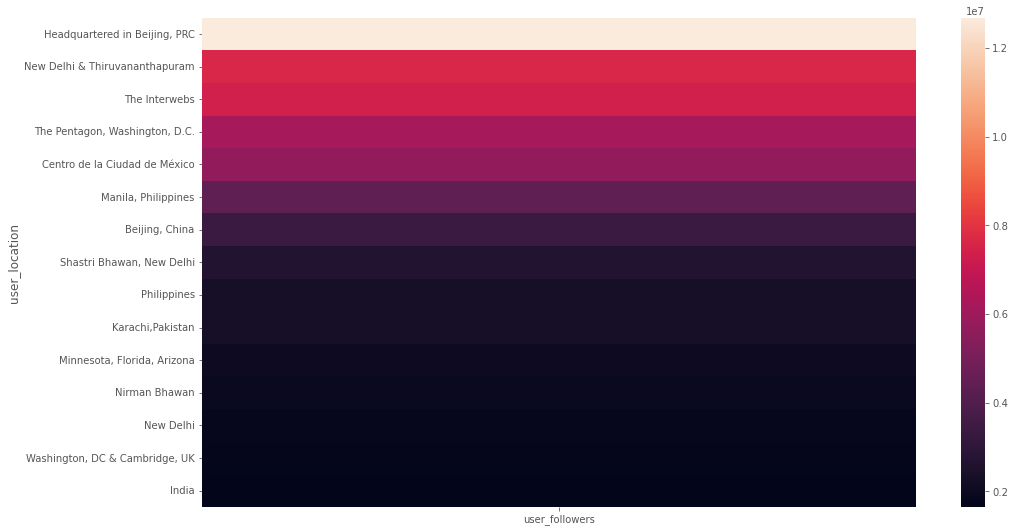

In [21]:
sns.heatmap(co_df_mn.head(15))

In [22]:
co_df_mdn.head(15)

,user_followers
user_location,
"Headquartered in Beijing, PRC",12680958.0
New Delhi & Thiruvananthapuram,7635618.5
The Interwebs,7379812.0
"Manila, Philippines",7015176.5
"The Pentagon, Washington, D.C.",6186636.0
Centro de la Ciudad de México,5686527.0
"Karachi,Pakistan",2715408.0
"Shastri Bhawan, New Delhi",2663760.0
"Minnesota, Florida, Arizona",2026886.0


<AxesSubplot:ylabel='user_location'>

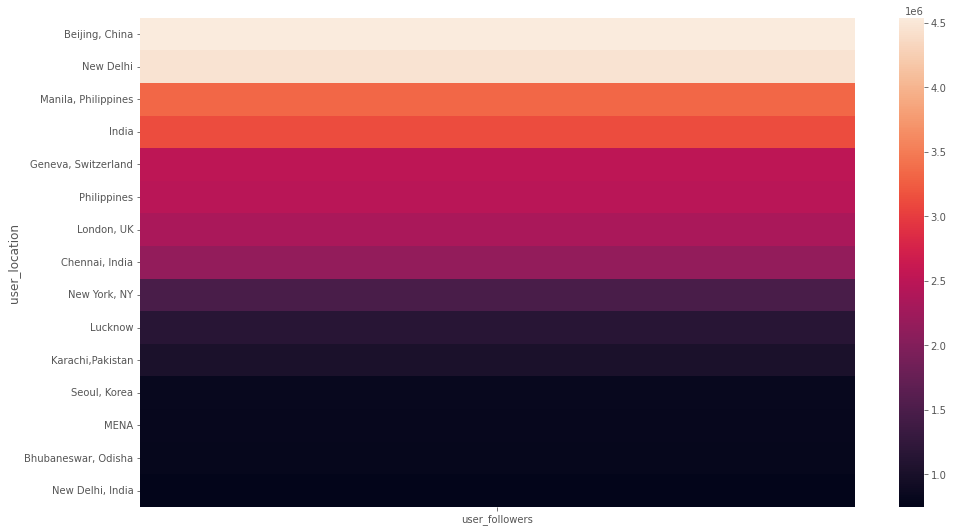

In [23]:
sns.heatmap(co_df_std.head(15))

In [24]:
co_df_std.head(15)

,user_followers
user_location,
"Beijing, China",4.539737e+06
New Delhi,4.456848e+06
"Manila, Philippines",3.336275e+06
India,3.118637e+06
"Geneva, Switzerland",2.511489e+06
Philippines,2.478788e+06
"London, UK",2.338115e+06
"Chennai, India",2.151701e+06
"New York, NY",1.483196e+06


<AxesSubplot:ylabel='user_location'>

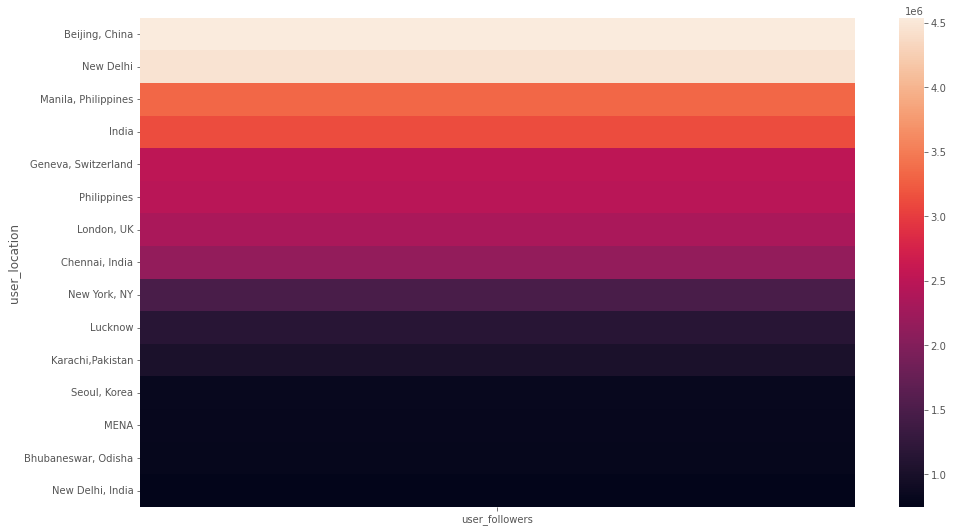

In [25]:
sns.heatmap(co_df_std.head(15))

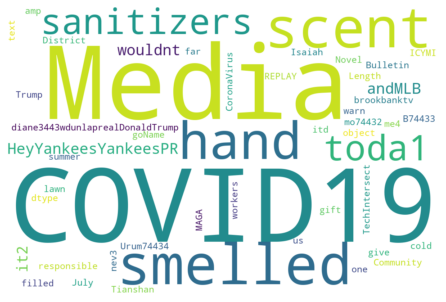

In [26]:
def text_cleaner(text):
    text = re.sub(r"\n", "", str(text))
    text = re.sub(r"\t", "", str(text))
    text = re.sub(r"\r", "", str(text))
    text = re.sub(r"\[", "", str(text))
    text = re.sub(r"\]", "", str(text))
    text = re.sub(r"nan", "", str(text))
    text = re. sub(r" (@)|(#)|(RT[\s]+)|(https?:\/\/\S+)|([^a-zA-Z0-9 -])", "", str(text))
    text = re. sub(r"\b(\w+)( \1\b)+", r"\1", text)
    text = text.strip(" ")
    return text



wo_hs = text_cleaner(df["text"])
from wordcloud import wordcloud
def wordcloud(w):
    WC = WordCloud(width=1200, height=800,
        background_color="white",
        max_words=200)
    WC.generate(w)
    # PLot
    fig=plt.figure(figsize=(6,4))
    plt.imshow(WC,interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout (pad=0)
    plt. show()
    
wordcloud(wo_hs)